# MATH 360 Mathematical Modelling 2
#### Team members: Bredan Sunderland, Kevin Wen, Reynaldi Aditama, and Tianyu Su

***

<br>

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.integrate as spi
from sklearn.preprocessing import MinMaxScaler

In [3]:
# get data from csv
customer_df = pd.read_csv('customer.csv')
weather_df = pd.read_csv('vancouver_weather.csv')

<br>

## 1. Problem Statement

Determine the possibility of Blue Chip Cafe getting revenue of more than $550,000 every year considering the effect of temperature and precipitation

<br>

## 2. Variables and Parameters

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| Average temperature per month | $T$ | <sup>o</sup>$C$ | dependant variable |
| Average precipitation per month | $P$ | $mm$ | dependant variable |
| Average customer per month | $C_0$ | 1 | dependant variable |
| Average of temperature from 1997 to 2022 | $T_0$ | <sup>o</sup>$C$ | dependant variable |
| Average of precipitation from 1997 to 2022 | $P_0$ | $mm$ | dependant variable |
| Rate of change of customers with respect to temperature | $a$ | 1 | parameter |
| Rate of change of customers with respect to precipitation | $b$ | 1 | parameter |
| Average spending per customer | $z$ | \$ | parameter |
| Percentage of operational cost per month | $c$ | 1 | parameter |
| Percentage of unexpected cost per month | $e$ | 1 | random variable |
| Revenue per month from 1997 to 2022 | $R_m$ | \$ | dependent variable |
| Revenue per year from 1997 to 2022 | $R_y$ | \$ | dependent variable |
| Annual Revenue | $ar$ | \$ | independent variable |

<br>

## 3. Assumptions and Constraints

- Average customer frequency matches historical data (January 1997 - December 2022)
- Average customer spending per month matches historical data (January 1997 - December 2022)
- Operational cost is equal to 20% of monthly sales
- The number of customers and amount of unexpected costs are random and normally distributed
- Unexpected costs covering damages or accidents are approximately (~10% of total sales)
- Average spending per customer is $9
- Rate of change of customers with respect to temperature is 1.5
- Rate of change of customers with respect to precipitation is 0.5

<br>

## 4. Build Solutions

In [6]:
C0 = np.sum(customer_df.Monthly_Frequency_Customers)
T0 = weather_df.avg_temperature.mean()
P0 = weather_df.precipitation.mean()
a = 1.5 
b = 0.5  
T = []
P = [] 
z = 9
c = 0.2  
e = 0.1  

years = [1997 + i for i in range(26)]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# finding the avg_temp and precipitation per month
def find_T_P():
    for i in years:
        for j in month:
            filter = 'year == ' + str(i) + ' & month == ' + str(j)
            filter_temp = weather_df.query(filter)['avg_temperature']
            filter_pre = weather_df.query(filter)['precipitation']
            T.append(filter_temp.mean())
            P.append(filter_pre.mean())
    
# finding the number of customers per month, almost impossible to go below zero since we calculated on a monthly basis not daily
def num_of_customers_per_month():
    return C0 + a * (T - T0) - b * (P - P0)

find_T_P()

In [8]:
n = num_of_customers_per_month()
n_std = np.std(n)

# adjusted n with its randomness
n_adjusted = np.array([stats.norm.rvs(loc=i, scale=n_std, size=1) for i in n]).flatten()

def revenue_per_month():
    return n_adjusted * z * (1 - c) * (1 - stats.norm.rvs(loc=0, scale=e, size=1))

<br>

## 5. Analyze and Assess

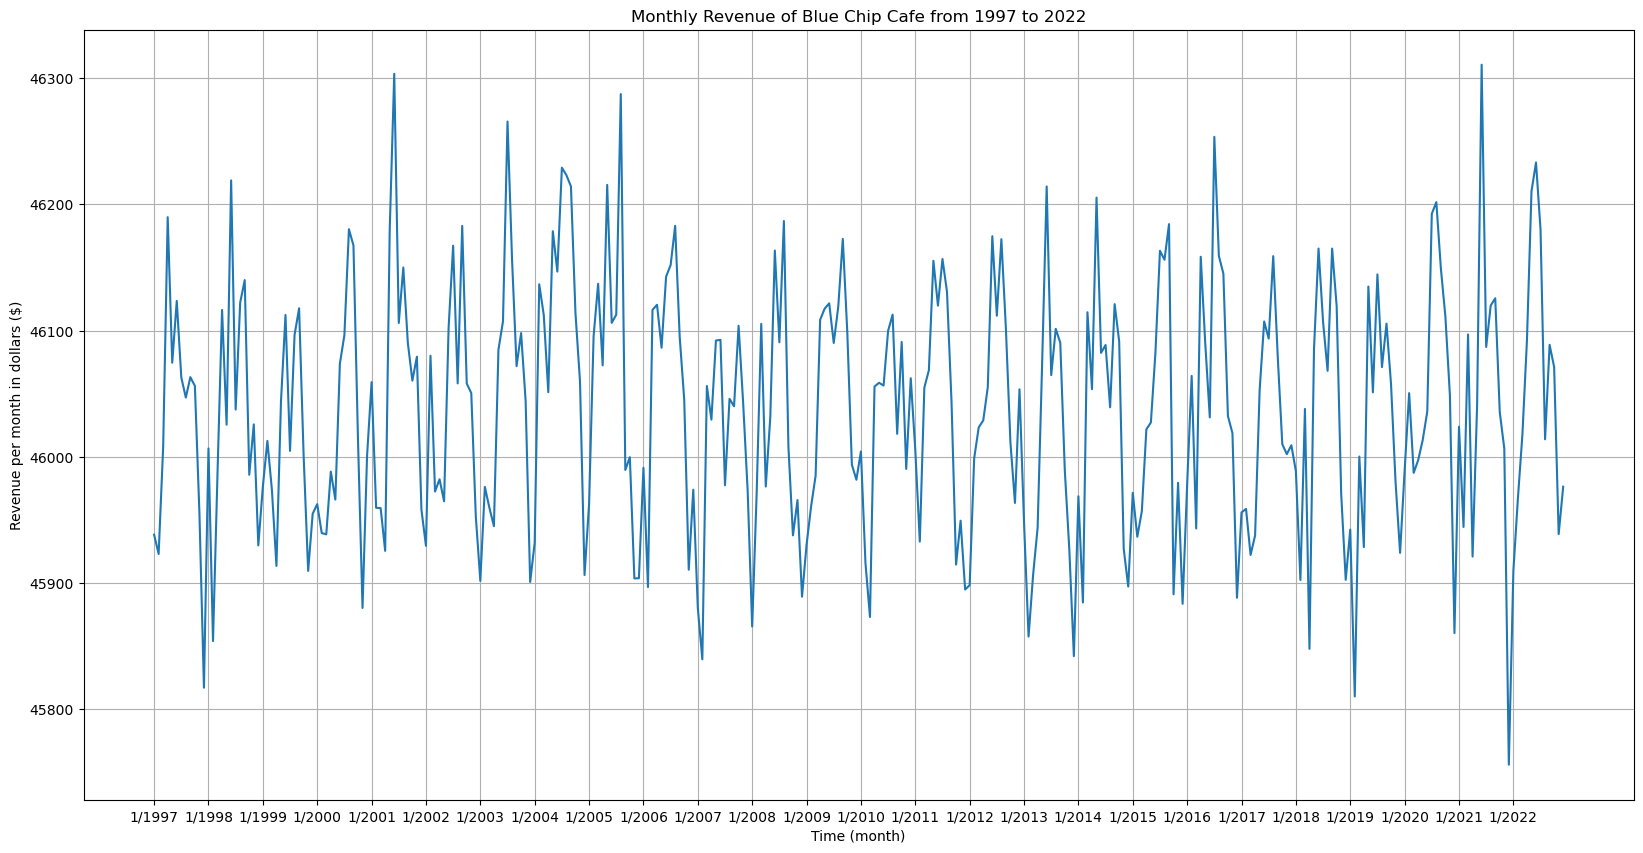

In [10]:
Rm = revenue_per_month()
Ry = []
x_month = []

for i in range(len(years)):
    Ry.append(Rm[i * 12] + Rm[i * 12 + 1] + Rm[i * 12 + 2] + Rm[i * 12 + 3] + Rm[i * 12 + 4] + Rm[i * 12 + 5] + Rm[i * 12 + 6] + Rm[i * 12 + 7] + Rm[i * 12 + 8] + Rm[i * 12 + 9] + Rm[i * 12 + 10] + Rm[i * 12 + 11])

for i in years:
    for j in month:
        x_month.append(str(j) + '/' + str(i))

plt.figure(figsize=(20, 10))
plt.plot(x_month, Rm)
plt.xlabel('Time (month)')
plt.ylabel('Revenue per month in dollars ($)')
plt.title('Monthly Revenue of Blue Chip Cafe from 1997 to 2022')
plt.xticks([i * 12 for i in range(len(years))])
plt.grid(True)
plt.show()

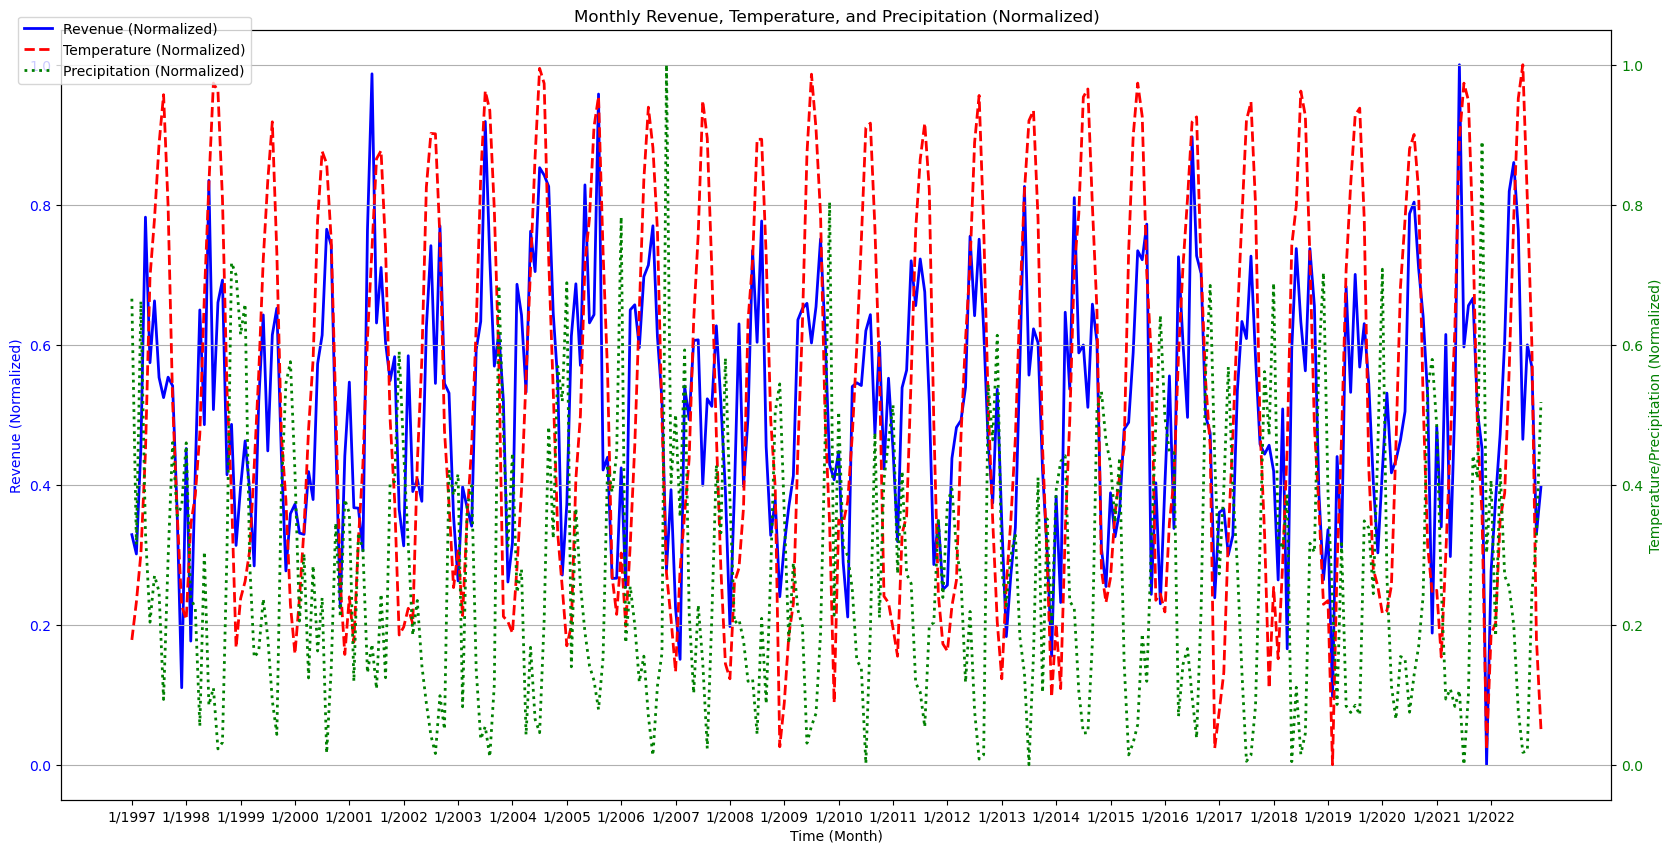

In [12]:
# Normalize all data
scaler = MinMaxScaler()
Rm_normalized = scaler.fit_transform(np.array(Rm).reshape(-1, 1)).flatten()
T_normalized = scaler.fit_transform(np.array(T).reshape(-1, 1)).flatten()
P_normalized = scaler.fit_transform(np.array(P).reshape(-1, 1)).flatten()

# Create a dual-axis plot for normalized revenue, temperature, and precipitation
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot normalized revenue on the primary axis
ax1.plot(x_month, Rm_normalized, label="Revenue (Normalized)", color="blue", linewidth=2)
ax1.set_xlabel("Time (Month)")
ax1.set_ylabel("Revenue (Normalized)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Add a secondary axis for temperature and precipitation
ax2 = ax1.twinx()
ax2.plot(x_month, T_normalized, label="Temperature (Normalized)", color="red", linestyle="--", linewidth=2)
ax2.plot(x_month, P_normalized, label="Precipitation (Normalized)", color="green", linestyle=":", linewidth=2)
ax2.set_ylabel("Temperature/Precipitation (Normalized)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title("Monthly Revenue, Temperature, and Precipitation (Normalized)")
plt.xticks([i * 12 for i in range(len(years))])
plt.grid(True)
plt.show()


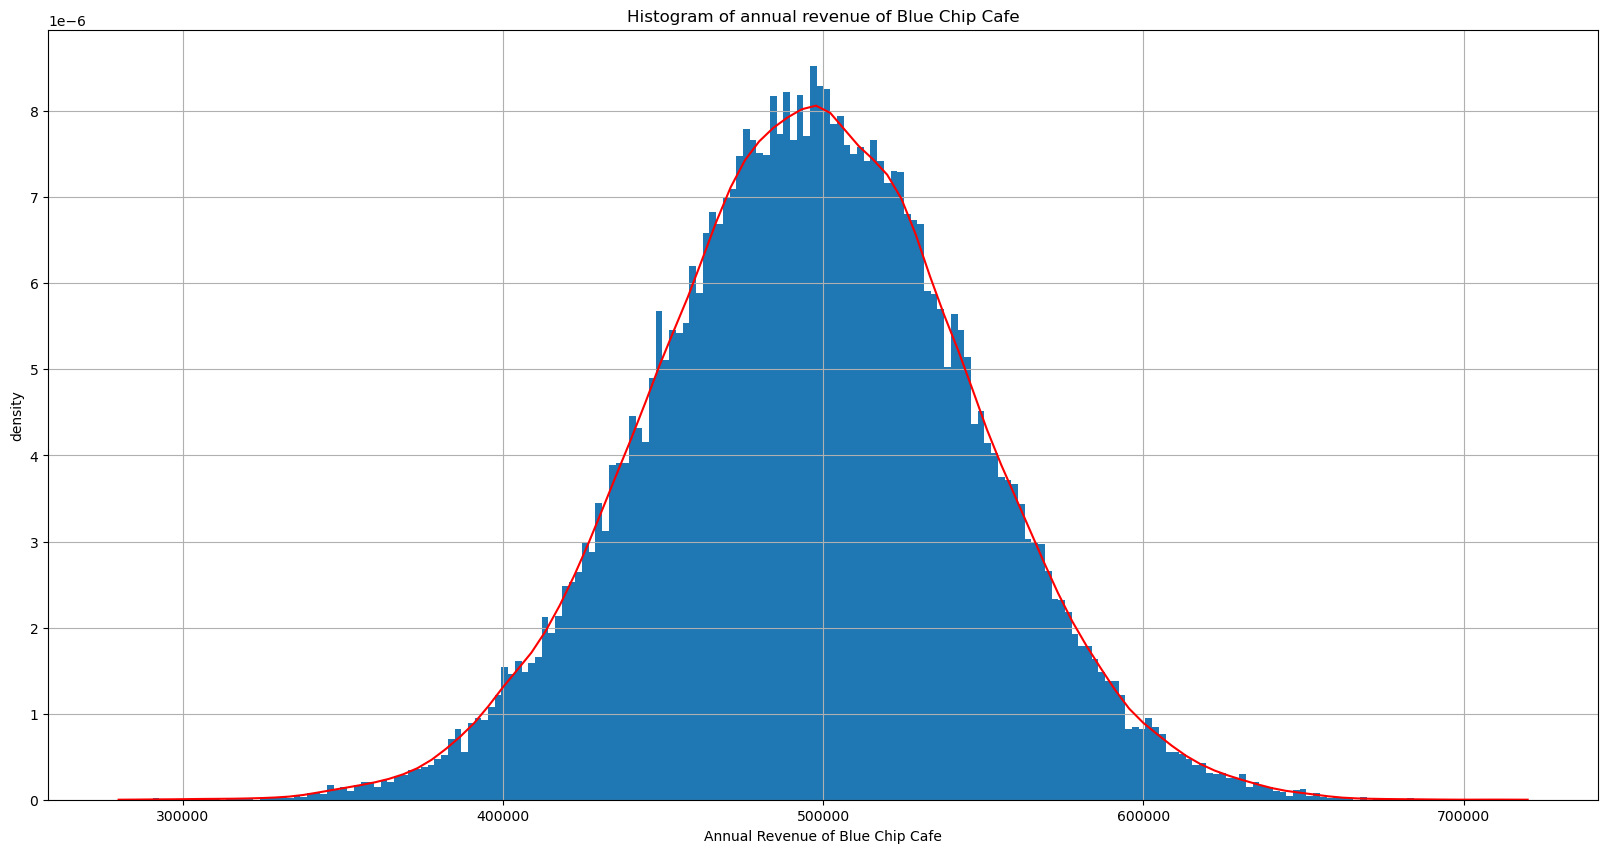

Probability of Blue Chip Cafe getting annual revenue above $550,000 annually is: 13.95 %
Average annual revenue of Blue Chip Cafe is: $496214.53
Standard deviation of annual revenue of Blue Chip Cafe is: $49564.36


In [14]:
# monte carlo simulation
N = 2000
ar = []

# total annual data is N * total years (26)
for i in range(N):
    for i in range(len(years)):
        Rm = revenue_per_month()
        ar.append(Rm[i * 12] + Rm[i * 12 + 1] + Rm[i * 12 + 2] + Rm[i * 12 + 3] + Rm[i * 12 + 4] + Rm[i * 12 + 5] + Rm[i * 12 + 6] + Rm[i * 12 + 7] + Rm[i * 12 + 8] + Rm[i * 12 + 9] + Rm[i * 12 + 10] + Rm[i * 12 + 11])

# getting the kernel estimation and histogram of annual revenue
kde = stats.gaussian_kde(ar)
x = np.linspace(280_000, 720_000, 100)

plt.figure(figsize=(20, 10))
plt.plot(x,kde(x),'r')
plt.hist(ar,bins=200,density=True)
plt.title('Histogram of annual revenue of Blue Chip Cafe')
plt.xlabel('Annual Revenue of Blue Chip Cafe')
plt.ylabel('density')
plt.grid(True)
plt.show()

# searching the probability of getting more than $550,000 annually
prob = kde.integrate_box_1d(550_000,np.inf)
print('Probability of Blue Chip Cafe getting annual revenue above $550,000 annually is: %.2f' % (prob * 100), '%')
print('Average annual revenue of Blue Chip Cafe is: $%.2f' % np.mean(ar))
print('Standard deviation of annual revenue of Blue Chip Cafe is: $%.2f' % np.std(ar))

<br>

## 6. Results

Based on our stochastic modeling analysis, our forecasting model indicates a 0.14 probability of Blue Chip Cafe achieving an annual revenue of \\$ 550,000, accounting for temperature and precipitation variables. The revenue distribution exhibits considerable variance, with a mean of approximately \\$ 490,000 and a standard deviation of \\$ 49,000. Through normalized time series analysis of the key variables - revenue, temperature, and precipitation - we observed a strong positive correlation between revenue and temperature patterns, while precipitation demonstrated an inverse relationship. The normalization technique was employed to mitigate scaling effects and enhance numerical stability in our analysis.

The revenue histogram and probability distribution suggest that under bad weather conditions (characterized by low temperature and high precipitation patterns), the annual revenue could go down to approximately \\$ 300,000. Conversely, favorable weather conditions could drive revenue up to $700,000 annually. A particularly notable finding is that the standard deviation of annual revenue (σ ≈ \\$ 49,000) approximates 1.25 times the average monthly revenue, indicating substantial weather-dependent volatility in the business performance.

Detailed analysis of monthly revenue reveals a consistent cyclical pattern, with revenue exhibiting positive growth trajectories culminating in summer peaks, followed by gradual decline during winter months, making a pattern "N". This seasonal pattern, combined with our correlation analysis, provides robust evidence for the significant impact of weather factors on Blue Chip Cafe's revenue performance. The observed seasonality and weather dependencies suggest that these environmental variables are critical determinants in the business's financial outcomes.